<a href="https://colab.research.google.com/github/codingbjs/DeepLearning/blob/main/TensorFlow/Keras_iris_Modeling_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [9]:
import tensorflow

tensorflow.__version__

'2.13.0'

In [10]:
import keras

keras.__version__

'2.13.1'

In [11]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [15]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

X.shape, y.shape

((150, 4), (150,))

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

LBE_y = encoder.fit_transform(y)
LBE_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
from tensorflow.keras.utils import to_categorical
OHE_y = to_categorical(LBE_y)
OHE_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, OHE_y,
                                                    test_size=0.3,
                                                    random_state=2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [24]:
Model_iris = models.Sequential()

Model_iris.add(layers.Dense(16, activation='relu', input_shape=(4,)))
Model_iris.add(layers.Dense(8, activation='relu'))
Model_iris.add(layers.Dense(3, activation='softmax'))

In [26]:
Model_iris.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243 (972.00 Byte)
Trainable params: 243 (972.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


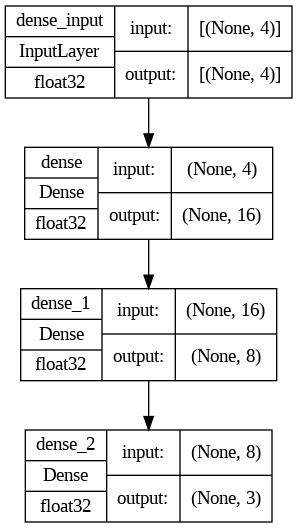

In [29]:
from tensorflow.keras import utils

utils.plot_model(Model_iris,
                 show_shapes=True,
                 show_dtype=True)

In [30]:
Model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [33]:
from sklearn.utils import validation
history_iris = Model_iris.fit(X_train, y_train,
                              epochs=250,
                              batch_size = 7,
                              validation_data=(X_test, y_test))

Epoch 1/250
15/15 [==============================] - 0s 6ms/step - loss: 0.0675 - accuracy: 0.9905 - val_loss: 0.0401 - val_accuracy: 0.9778
Epoch 2/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0732 - accuracy: 0.9810 - val_loss: 0.0322 - val_accuracy: 0.9778
Epoch 3/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0753 - accuracy: 0.9714 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 4/250
15/15 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.9810 - val_loss: 0.0376 - val_accuracy: 0.9778
Epoch 5/250
15/15 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9905 - val_loss: 0.0281 - val_accuracy: 1.0000
Epoch 6/250
15/15 [==============================] - 0s 4ms/step - loss: 0.0832 - accuracy: 0.9714 - val_loss: 0.0375 - val_accuracy: 0.9778
Epoch 7/250
15/15 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9905 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 8/250
1

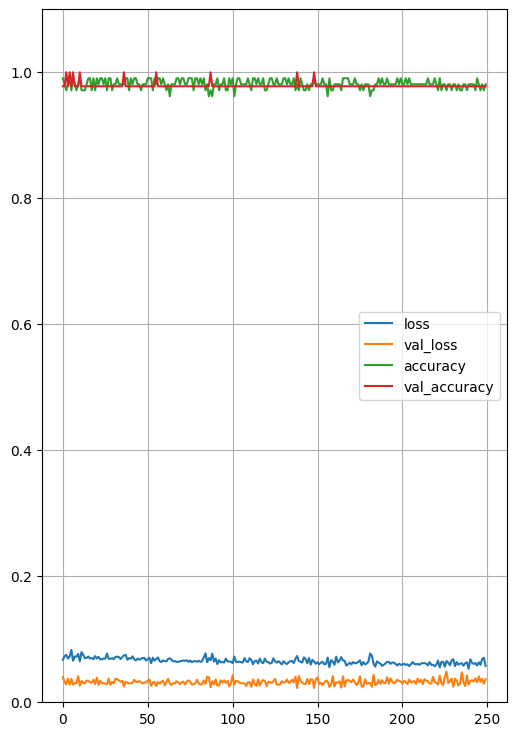

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,9))
plt.ylim(0,1.1)
plt.plot(history_iris.history['loss'])
plt.plot(history_iris.history['val_loss'])
plt.plot(history_iris.history['accuracy'])
plt.plot(history_iris.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [38]:
loss, accuracy = Model_iris.evaluate(X_test, y_test, verbose=0)
print('loss = {:.5f}'.format(loss))
print('accuracy = {:.5f}'.format(accuracy))

loss = 0.03667
accuracy = 0.97778


In [39]:
from tensorflow.python.ops.gen_nn_ops import max_pool3d_eager_fallback
import numpy as np

np.set_printoptions(suppress=True, precision=5)

Model_iris.predict(X_test, verbose=0)

array([[0.99987, 0.00013, 0.     ],
       [0.99954, 0.00046, 0.     ],
       [0.00654, 0.99346, 0.     ],
       [0.     , 0.00009, 0.99991],
       [0.99995, 0.00005, 0.     ],
       [0.0002 , 0.9998 , 0.00001],
       [0.     , 0.00543, 0.99457],
       [0.99997, 0.00003, 0.     ],
       [0.     , 0.00105, 0.99895],
       [0.99988, 0.00012, 0.     ],
       [0.     , 0.9358 , 0.0642 ],
       [0.     , 0.0025 , 0.9975 ],
       [0.     , 0.99886, 0.00114],
       [0.99999, 0.00001, 0.     ],
       [0.99996, 0.00004, 0.     ],
       [0.     , 0.99851, 0.00149],
       [0.     , 0.99276, 0.00724],
       [0.99987, 0.00013, 0.     ],
       [0.     , 0.99988, 0.00012],
       [0.99997, 0.00003, 0.     ],
       [0.99989, 0.00011, 0.     ],
       [0.99988, 0.00012, 0.     ],
       [0.     , 0.00073, 0.99927],
       [0.99992, 0.00008, 0.     ],
       [0.     , 0.0503 , 0.9497 ],
       [0.     , 0.01289, 0.98711],
       [0.99995, 0.00005, 0.     ],
       [0.     , 0.9989 , 0.

In [40]:
y_hat = np.argmax(Model_iris.predict(X_test, verbose=0), axis=1)
y_hat

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [41]:
y = np.argmax(y_test, axis=1)
y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 13]])

In [44]:
print(classification_report(y, y_hat,
                            target_names=['setosa',
                                          'versicolor',
                                          'virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.93      1.00      0.97        14
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [50]:
!ls -l


total 68
-rw-r--r-- 1 root root 34240 Oct 10 04:56 Model_iris.h5
-rw-r--r-- 1 root root 27143 Oct 10 04:30 model.png
drwxr-xr-x 1 root root  4096 Oct  6 13:25 sample_data


In [49]:
Model_iris.save('/content/Model_iris.h5')
!ls -l

total 68
-rw-r--r-- 1 root root 34240 Oct 10 04:56 Model_iris.h5
-rw-r--r-- 1 root root 27143 Oct 10 04:30 model.png
drwxr-xr-x 1 root root  4096 Oct  6 13:25 sample_data


In [51]:
from google.colab import files

files.download('/content/Model_iris.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
from tensorflow.keras.models import load_model

Model_local = load_model('/content/Model_iris.h5')

In [56]:
np.argmax(Model_iris.predict(X_test, verbose=0), axis=1)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [58]:
from google.colab import drive

drive.mount('/content/driver')

Mounted at /content/driver


In [59]:
!mkdir -p '/content/driver/MyDrive/Colab Notebooks/models'

In [60]:
!ls -l '/content/driver/MyDrive/Colab Notebooks/models'

total 0


In [61]:
Model_iris.save('/content/driver/MyDrive/Colab Notebooks/models/001_Model_iris.h5')

In [62]:
!ls -l '/content/driver/MyDrive/Colab Notebooks/models'

total 34
-rw------- 1 root root 34240 Oct 10 06:59 001_Model_iris.h5


In [63]:
Model_google = load_model('/content/driver/MyDrive/Colab Notebooks/models/001_Model_iris.h5')

In [64]:
np.argmax(Model_google.predict(X_test, verbose=0), axis=1)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])